# Load Package

In [306]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,MinMaxScaler


# Load Data

train_users.csv - the training set of users

test_users.csv - the test set of users

id: user id

date_account_created: the date of account creation

timestamp_first_active: timestamp of the first activity, note that it can be earlier than date_account_created or date_first_booking because a user can search before signing up

date_first_booking: date of first booking

gender

age

signup_method

signup_flow: the page a user came to signup up from

language: international language preference

affiliate_channel: what kind of paid marketing

affiliate_provider: where the marketing is e.g. google, craigslist, other

first_affiliate_tracked: whats the first marketing the user interacted with before the signing up

signup_app

first_device_type

first_browser

country_destination: this is the target variable you are to predict

In [115]:
train = pd.read_csv("train.csv",index_col="id",parse_dates=["date_account_created","timestamp_first_active"])
test = pd.read_csv("test.csv",index_col="id",parse_dates=["date_account_created","timestamp_first_active"])

In [116]:
print(train.shape)
print(test.shape)

(213451, 15)
(62096, 14)


In [117]:
train.head()

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
id,,,,,,,,,,,,,,,
gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [118]:
test.head()

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
id,,,,,,,,,,,,,,
5uwns89zht,2014-07-01,2014-07-01 00:00:06,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
jtl0dijy2j,2014-07-01,2014-07-01 00:00:51,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
xx0ulgorjt,2014-07-01,2014-07-01 00:01:48,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
6c6puo6ix0,2014-07-01,2014-07-01 00:02:15,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
czqhjk3yfe,2014-07-01,2014-07-01 00:03:05,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


# Explore data

In [119]:
print("train has {} columns".format(len(train.columns)))
print("test has {} columns".format(len(test.columns)))

train has 15 columns
test has 14 columns


### Unique data

In [120]:
for i in train.columns:
    print("{} has {} unique data".format(i, len(train[i].unique())))

date_account_created has 1634 unique data
timestamp_first_active has 213451 unique data
date_first_booking has 1977 unique data
gender has 4 unique data
age has 128 unique data
signup_method has 3 unique data
signup_flow has 17 unique data
language has 25 unique data
affiliate_channel has 8 unique data
affiliate_provider has 18 unique data
first_affiliate_tracked has 8 unique data
signup_app has 4 unique data
first_device_type has 9 unique data
first_browser has 52 unique data
country_destination has 12 unique data


In [121]:
for i in test.columns:
    print("{} has {} unique data".format(i, len(test[i].unique())))

date_account_created has 92 unique data
timestamp_first_active has 62096 unique data
date_first_booking has 1 unique data
gender has 4 unique data
age has 125 unique data
signup_method has 4 unique data
signup_flow has 7 unique data
language has 24 unique data
affiliate_channel has 7 unique data
affiliate_provider has 17 unique data
first_affiliate_tracked has 8 unique data
signup_app has 4 unique data
first_device_type has 9 unique data
first_browser has 31 unique data


### Missing data

In [122]:
#check missing data in train
for i in train.columns:
    print("{0} has {1:.2f}% missing data".format(i, (len(train[train[i].isnull()]) / train.shape[0]) *100)) 

date_account_created has 0.00% missing data
timestamp_first_active has 0.00% missing data
date_first_booking has 58.35% missing data
gender has 0.00% missing data
age has 41.22% missing data
signup_method has 0.00% missing data
signup_flow has 0.00% missing data
language has 0.00% missing data
affiliate_channel has 0.00% missing data
affiliate_provider has 0.00% missing data
first_affiliate_tracked has 2.84% missing data
signup_app has 0.00% missing data
first_device_type has 0.00% missing data
first_browser has 0.00% missing data
country_destination has 0.00% missing data


In [123]:
#check missing data in train
for i in test.columns:
    print("{0} has {1:.2f}% missing data".format(i, (len(test[test[i].isnull()]) / test.shape[0]) *100)) 

date_account_created has 0.00% missing data
timestamp_first_active has 0.00% missing data
date_first_booking has 100.00% missing data
gender has 0.00% missing data
age has 46.50% missing data
signup_method has 0.00% missing data
signup_flow has 0.00% missing data
language has 0.00% missing data
affiliate_channel has 0.00% missing data
affiliate_provider has 0.00% missing data
first_affiliate_tracked has 0.03% missing data
signup_app has 0.00% missing data
first_device_type has 0.00% missing data
first_browser has 0.00% missing data


Common missing data are age and first_affiliate_tracked 

In [124]:
#merge train and test data
all_data = pd.concat([train,test],axis =0)

In [125]:
#drop label and not common feature
all_data.drop(["country_destination","timestamp_first_active","date_first_booking"],axis=1,inplace=True)

### Define Data type

date_first_booking can't be feature        

In [126]:
cat_data = ["gender","signup_method","language","affiliate_channel","affiliate_provider",
            "first_affiliate_tracked","signup_app","first_device_type","first_browser"] 
num_data =["date_account_created","timestamp_first_active","age","signup_flow"]

## Address missing data

### age

Age has almost 50% of missing data so, using mean or mode is not a right way to address missing data

In [127]:
#max of age is 2014? and min of age is 1? it does't make sense
all_data.describe()

,age,signup_flow
count,158681.000000,275547.000000
mean,47.145310,4.291965
std,142.629468,8.794313
min,1.000000,0.000000
25%,28.000000,0.000000
50%,33.000000,0.000000
75%,42.000000,1.000000
max,2014.000000,25.000000


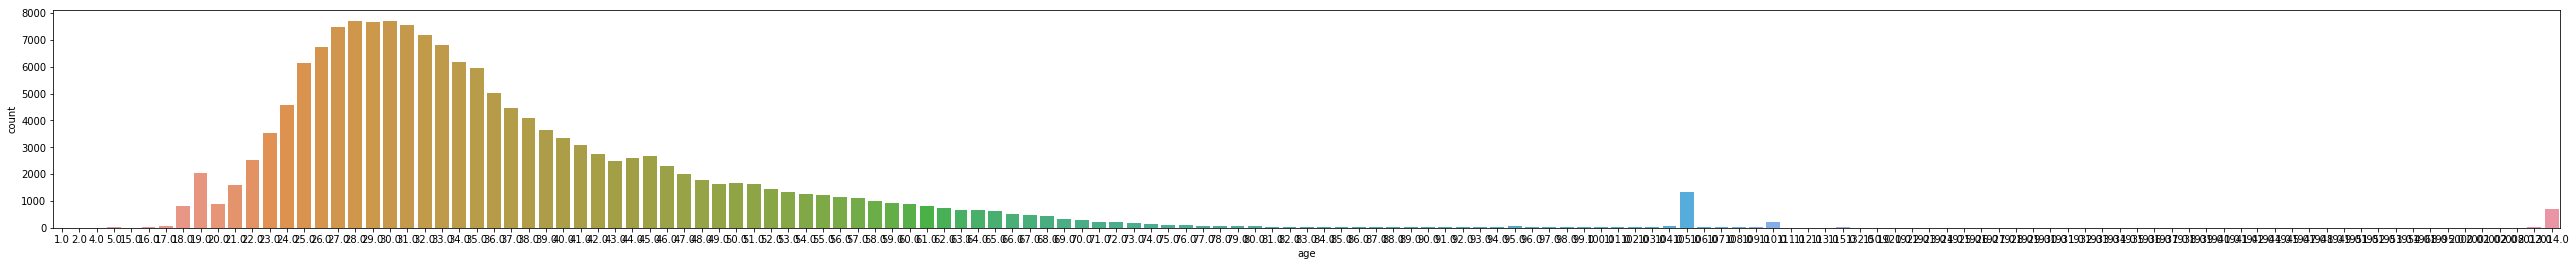

In [28]:
figure,ax= plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(45,4)
sns.countplot(all_data["age"])

In [ ]:
#address outlier data

### first_affiliate_tracked 

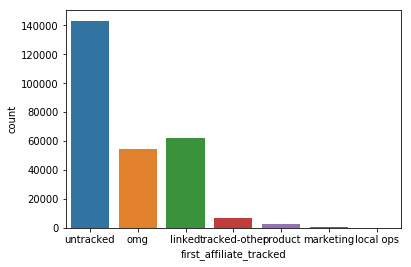

In [33]:
sns.countplot(all_data["first_affiliate_tracked"])

In [128]:
all_data.loc[all_data["first_affiliate_tracked"].isnull(),"first_affiliate_tracked"] = all_data["first_affiliate_tracked"].mode()[0]

In [129]:
all_data.loc[all_data["first_affiliate_tracked"].isnull(),"first_affiliate_tracked"]

Series([], Name: first_affiliate_tracked, dtype: object)

Replace missing data with mode

# Explore each feature and label

In [130]:
print(all_data.columns)
print(len(all_data.columns))

Index(['affiliate_channel', 'affiliate_provider', 'age',
       'date_account_created', 'first_affiliate_tracked', 'first_browser',
       'first_device_type', 'gender', 'language', 'signup_app', 'signup_flow',
       'signup_method'],
      dtype='object')
12


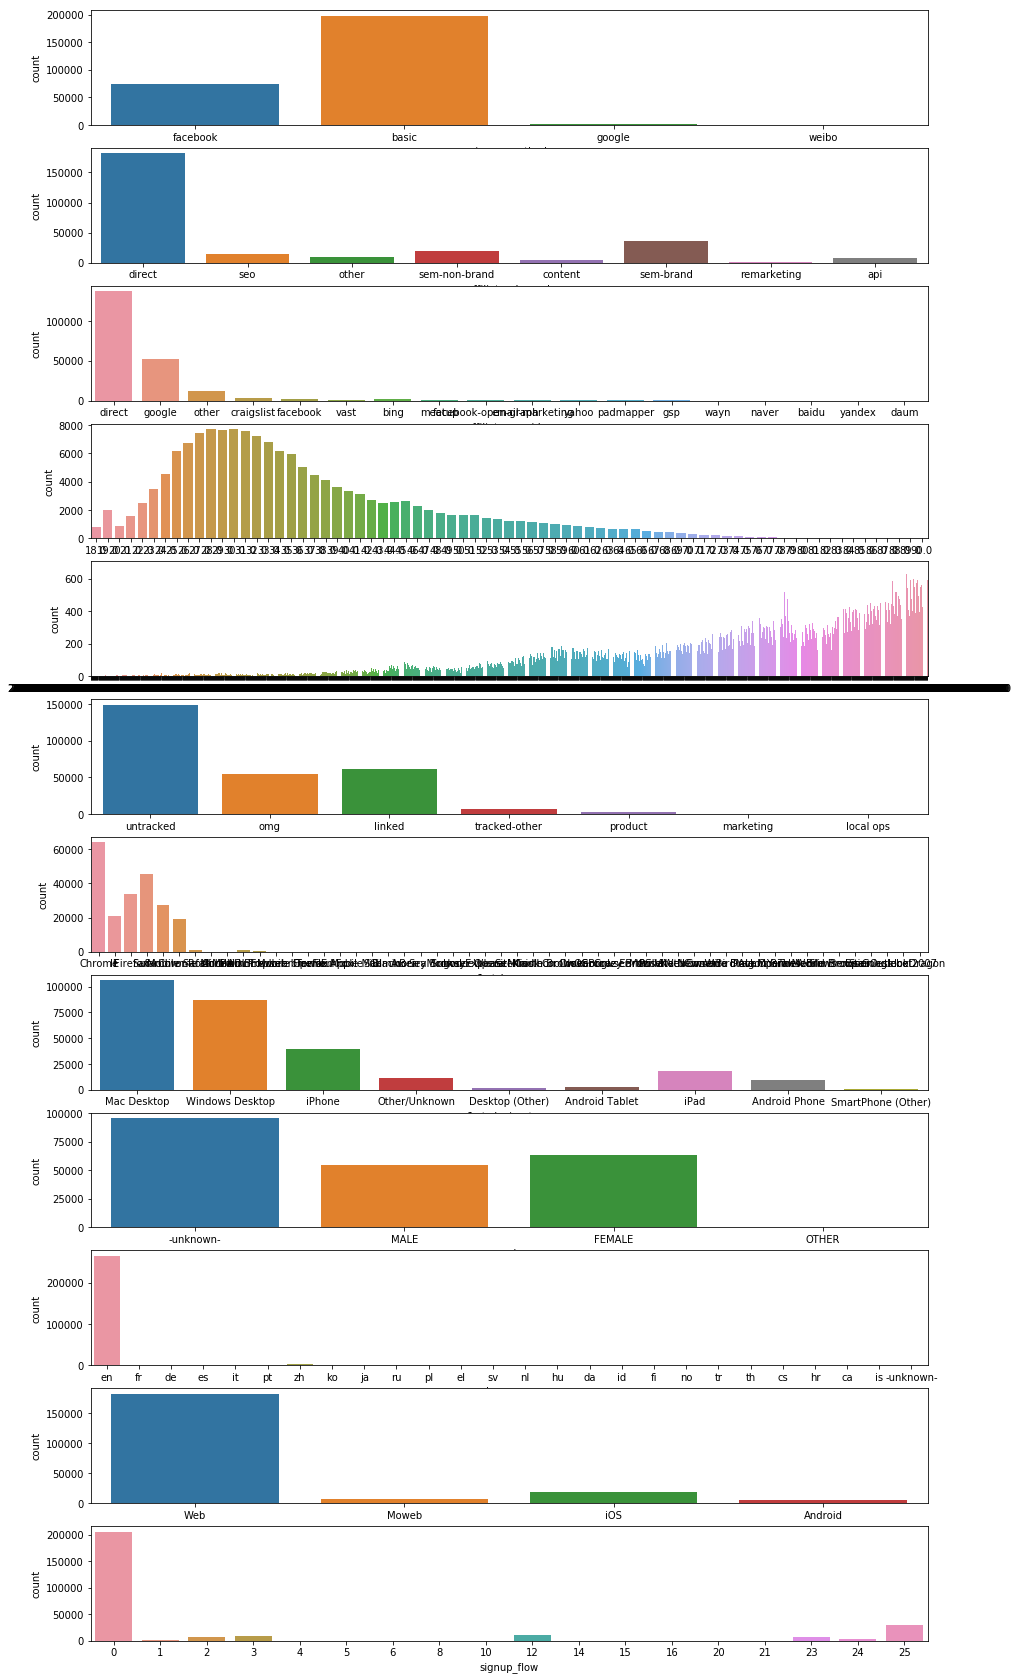

In [67]:
#feature visualization
figure,(ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12) = plt.subplots(nrows=12,ncols=1)
figure.set_size_inches(15,30)
sns.countplot(all_data["signup_method"],ax=ax1)
sns.countplot(all_data["affiliate_channel"],ax=ax2)
sns.countplot(train["affiliate_provider"],ax=ax3)
sns.countplot(all_data["age"],ax=ax4)
sns.countplot(train["date_account_created"],ax=ax5)
sns.countplot(all_data["first_affiliate_tracked"],ax=ax6)
sns.countplot(train["first_browser"],ax=ax7)
sns.countplot(all_data["first_device_type"],ax=ax8)
sns.countplot(train["gender"],ax=ax9)
sns.countplot(all_data["language"],ax=ax10)
sns.countplot(train["signup_app"],ax=ax11)
sns.countplot(all_data["signup_flow"],ax=ax12)

# Feature engineering

## Date Data

In [131]:
train["year"] = train["date_account_created"].dt.year
train["month"] = train["date_account_created"].dt.month
train["day"] = train["date_account_created"].dt.day
train["dayofweek"] = train["date_account_created"].dt.dayofweek

test["year"] = test["date_account_created"].dt.year
test["month"] = test["date_account_created"].dt.month
test["day"] = test["date_account_created"].dt.day
test["dayofweek"] = test["date_account_created"].dt.dayofweek



all_data["year"] = all_data["date_account_created"].dt.year
all_data["month"] = all_data["date_account_created"].dt.month
all_data["day"] = all_data["date_account_created"].dt.day
all_data["dayofweek"] = all_data["date_account_created"].dt.dayofweek

In [ ]:
all_data.drop("date_account_created",axis=1, inplace=True)

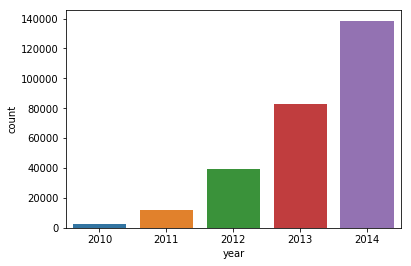

In [102]:
sns.countplot(all_data["year"])

Graph shows that airbnb's customoers are increasing very fast year by year

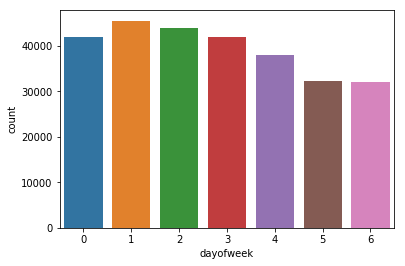

In [103]:
sns.countplot(all_data["dayofweek"])

people book accomodation weekday rather then weekend

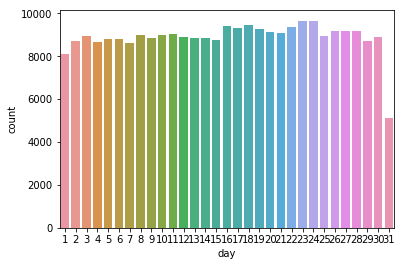

In [134]:
sns.countplot(all_data["day"])

most of month do not have 31days that's why day of 31's count is lowewr than other day

## Age

### hypothesis: country_destination will be different dependant on range of age

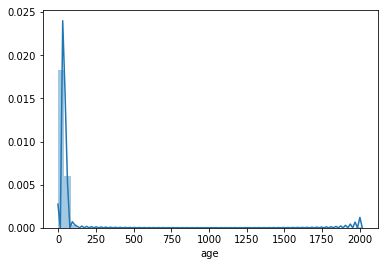

In [149]:
sns.distplot(all_data["age"].dropna())

In [151]:
all_data["age"].describe()

count    158681.000000
mean         47.145310
std         142.629468
min           1.000000
25%          28.000000
50%          33.000000
75%          42.000000
max        2014.000000
Name: age, dtype: float64

there is nonsense data in age feature

In [153]:
all_data.loc[all_data["age"] > 100,"age"] = np.nan
all_data.loc[all_data["age"] < 16,"age"] = np.nan

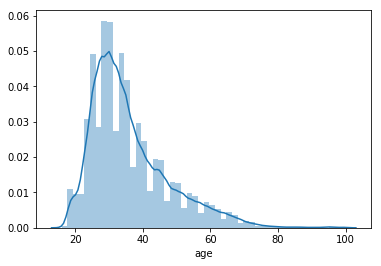

In [158]:
sns.distplot(all_data["age"].dropna())

In [251]:
age = 45

In [252]:
younger = sum(train.loc[train["age"] < age, "country_destination"].value_counts())
older  = sum(train.loc[train["age"] > age, "country_destination"].value_counts())

In [253]:
younger

97288

In [254]:
younger_destination = train.loc[train["age"] < age, "country_destination"].value_counts() / younger

In [264]:
younger_destination = train.loc[train["age"] < age, "country_destination"].value_counts() / younger *100

In [265]:
younger_destination

NDF      44.155497
US       39.955596
other     6.177535
FR        2.879081
IT        1.587041
ES        1.427720
GB        1.314653
CA        0.855193
DE        0.679426
NL        0.493380
AU        0.345366
PT        0.129512
Name: country_destination, dtype: float64

In [269]:
order_destination

NDF      49.588841
US       34.395174
other     5.590993
FR        3.239318
GB        1.779127
IT        1.779127
ES        1.137412
CA        0.895327
DE        0.683984
NL        0.438057
AU        0.357362
PT        0.115278
Name: country_destination, dtype: float64

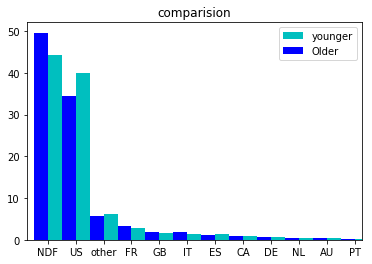

In [271]:
younger_destination.plot(kind = "bar", color ="c",position = 0, title="comparision", label="younger", rot=0)
order_destination.plot(kind ="bar", color ="b", position =1, label="Older", rot= 0)
plt.legend()

trip pattern is different dependent on age

In [280]:
len(all_data[all_data["age"].isnull()]) / all_data.shape[0] *100

43.41328339629899

problem is how to deal with 41% missing age data

three solution 
1. remove age data
2. replace missing age data with mode or mean
3. replace missing age data with -1 

### remove age data

In [283]:
all_data_1 = all_data.drop("age",axis=1)

In [302]:
# num_data.remove("date_account_created")
# num_data.remove("timestamp_first_active")
num_data.remove("age")

In [290]:
new_num = ["year","month","day","dayofweek"]

In [291]:
num_data = num_data + new_num

In [323]:
num_all_data_1 = all_data_1[num_data]

In [297]:
cat_all_data_1 = pd.get_dummies(all_data[cat_data])

scaling num data

In [307]:
minmax = MinMaxScaler()
num_all_data_1 = minmax.fit_transform(num_all_data_1)
num_all_data_1 = pd.DataFrame(num_all_data_1,index=all_data_1.index, columns=num_data)
all_data_1 = pd.concat([num_all_data_1,cat_all_data_1],axis=1)
train_1 = all_data_1[0:213451]
test_1 = all_data_1[213451:275547]

### replace missing data with mode

In [451]:
all_data_2 = all_data
all_data_2.loc[all_data_2["age"].isnull(),"age"] = all_data_2["age"].mode()[0]

In [454]:
cat_all_data_2 = all_data_2[cat_data]
num_all_data_2 = all_data_2[num_data]

In [456]:
minmax = MinMaxScaler()
num_all_data_2 = minmax.fit_transform(num_all_data_2)
num_all_data_2 = pd.DataFrame(num_all_data_2,index=all_data.index, columns=num_data)
all_data_2 = pd.concat([num_all_data_2,cat_all_data_2],axis=1)
train_2 = all_data_2[0:213451]
test_2 = all_data_2[213451:275547]
train_2.shape

(213451, 141)

### replace missing data with -1

In [480]:
all_data_3 = all_data
all_data_3.loc[all_data_3["age"].isnull(),"age"] = -1

In [478]:
num_all_data_3 = all_data_3[num_data]
cat_all_data_3 = all_data_3[cat_data]

In [481]:
cat_all_data_3 = pd.get_dummies(cat_all_data_3)

In [482]:
minmax = MinMaxScaler()
num_all_data_3 = minmax.fit_transform(num_all_data_3)
num_all_data_3 = pd.DataFrame(num_all_data_3,index=all_data.index, columns=num_data)
all_data_3 = pd.concat([num_all_data_3,cat_all_data_3],axis=1)
train_3 = all_data_3[0:213451]
test_3 = all_data_3[213451:275547]
train_3.shape

(213451, 141)

## Apply feature selection

In [516]:
model = xgb.XGBClassifier(nthread=4)
model

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [517]:
model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=4,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [518]:
imp_feat_xgb = pd.Series(model.feature_importances_, index=x_train.columns).sort_values(ascending=False)

In [520]:
indices = np.argsort(model.feature_importances_)[::-1]
select_feat =[str(s) for s in x_train.columns[indices][:50]]

# Train

In [483]:
import xgboost as xgb

In [522]:
x_train = train_3[select_feat]

In [523]:
x_test = test_3[select_feat]

In [525]:
y_train = train["country_destination"]

In [526]:
lbc = LabelEncoder()

In [527]:
y_train = lbc.fit_transform(y_train)

In [528]:
model =xgb.XGBClassifier(nthread=4,max_depth=6, learning_rate=0.3, n_estimators=25,
                    objective='multi:softprob', subsample=0.5, colsample_bytree=0.5, seed=0)

In [490]:
model

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.5,
       gamma=0, learning_rate=0.3, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=None, n_estimators=25, nthread=4,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.5)

In [530]:
model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.5,
       gamma=0, learning_rate=0.3, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=None, n_estimators=25, nthread=4,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.5)

In [531]:
y_predict= model.predict(x_test)

In [532]:
y_predict = lbc.inverse_transform(y_predict)

In [533]:
y_predcit = y_predict.reshape(-1,1)

# Submit

In [534]:
submit =pd.read_csv("sample_submission_NDF.csv")

In [535]:
submit["country"] = y_predcit

In [536]:
submit.set_index("id",inplace=True)

In [537]:
submit.to_csv("submit4.csv")

remove age: Kaggle score: 0.69315

replace missing data with mode: kaggle score: 0.70973

replace missing data with -1:0.70973

Apply feature selection :0.70866